# Reinforcement Learning for Engineers in a Hurry
> "Simple and practical RL leveraging Keras and OpenAI Gym"
- Author: Matthew Ocando - [GitHub](https://github.com/matthewocando)
- categories: [Machine Learning, Reinforcement Learning, Neural Networks]

## What is Reinforcement Learning?

Reinforcement Learning (RL) in the context of Machine Learning (ML) is one of the three fundamental ML paradigms.

<img src="imgs_for_RL/venn.png" alt="ML Intersection" width="400"/>

To properly answer this question, we first need to dive into the different aspects of RL.

Herein, we will use certain terminology to discuss the nature of RL. It is crucial to understand their meanings and how they distinguish RL from the other branches of ML. To get things started, we will present the notion of an **agent** existing in an **environment.** 

An **environment** in the relevant context refers to a space - not necessarily a physical one - that exists and can be interacted with. Interactions with such an environment are called **actions** and should produce some sort of response that can be percieved by anything existing in that environment.

An **agent** exists in an environment and is able to percieve it, meaning that any response that the environment produces can be experienced by the agent. More specifically, an **intelligent agent** (IA) is one who takes non-random actions based on feedback from an environment. This feedback comes in the form of two notions, **state** and **reward**, which we will discuss more later. An IA takes said actions in order to reach some desirable end result. They may exhibit learning by adjusting their actions over time, or memory by using past experiences in an environment to adjust their current actions.

Putting these concepts together, RL involves an agent learning to take actions in an environment to reach some goal.

## Making a Move

For the purpose of RL, it is necessary to have actions performed in a controlled and measurable manner so that we may use information produced by the environment for the benefit of learning. This is where our **step function** comes into play. A step function can be thought of as the process of taking an action, and recieving a response. It is best summarized in a diagram.

<img src="imgs_for_RL/RLflow.jpg" alt="RL flowchart" width="500"/>

We see the aforementioned terms **state** and **reward** appearing in this flowchart. The state of the environment embodies some variable that describes the environment and changes over time. For example, humidity may be a state variable of the atmosphere. The reward is some feedback from the environment that characterizes the action taken by the agent. A desirable action outcome recieves a positive reward, while an undesireable outcome recieves a negative reward.

An agent chooses to take an action A on the environment at time t based on the current state S at that same time t. The current action A applied on the environment results in a new state produced at time t+1. As we 'take a step,' The new state becomes the current, producing a certain action. The cycle repeats, each being called a **step**. This results in a continuous feedback loop that allows the agent to exist meaningfully.

## Decisions, Decisions

The pertinent question still remains, how *does* an IA make decisions, or learn to do so? Noteably in the previous section, we had little to say about the reward aspect of the flowchart. This reward is what teaches our IA to make certain decisions.

The 'brain' of the IA is the **policy network**. In essence, this is a mathematical function that takes a set of inputs and maps them to an output space. This function has parameters that can be changed to produce different outputs for a given input set. We can exploit this relationship if we are able to determine how to tune these parameters such that the mapping function always leads our IA to the best output based on its inputs. This is the concept of **learning**.

More specifically, in RL an IA learns to tune these parameters so that it always makes the best choice for a given environment state. The notion of 'best' is where our reward comes in. If an IA recieves a positive reward for an action performed due to an input state, we tune the policy network's parameters such that the IA is a bit more likely to produce the same action the next time that state comes around. If an IA recieves a negative reward (penalty), we do the opposite and tune so that it is less likely to repeat this behaviour.

The 'tuning' process is a vastly complex topic that need not be explained here to grasp the idea of RL. It suffices to know why this tuning happens and how it affects the IA's behaviour.

## The Brain

For the purpose of this tutorial, we will use a **Neural Network** (NN) as the policy network for our IA. 

<img src="imgs_for_RL/NNtp.png" alt="NN flowchart" width="500"/>

Neural networks reflect the way that biological brains are designed (in a very simplified manner, that is). Once again, NNs are realtively complex and will not be explained here, but it suffices to know that they fit the role of a policy network. The NN has tunable parameters (weights, biases), an input layer (for our state) and an output layer (for our action). The weights and biases will be varied according to the reward recieved during learning.



## Putting the Pieces Together

All in all, we end up with a diagram that looks like the following.

<img src="imgs_for_RL/compile.png" alt="RL compiled" width="500"/>

The NN takes actions based on the state. When learning, the reward updates the parameters of the NN.

Something to note is that when the agent is not learning, the rewards are out the picture. Rewards are only present when learning, and otherwise, our agent is only able to see the state of the environment.

## Training an Intelligent Agent

We will be working in Python, using Keras/Tensorflow as our backbone as well as a reinforcement learning API, Keras-RL. Additionally, to simplify the creation of an environment we will be leveraging OpenAI Gym {% fn 1 %} which presents many simple environments with states, steps, actions, rewards and such already integrated.

### 0. Getting Things Ready

First, we need to install any dependencies that we may not already have.

In [75]:
#collapse
#!pip install numpy
#!pip install gym
#!pip install pygame
#!pip install tensorflow==2.5.0
#!pip install keras
#!pip install keras-rl2
#!pip install nnv

### 1. Testing the Environment

We make the necessary imports to get started with the design of our environment.

In [76]:
#collapse
import gym
import random
import warnings

Next, we can start setting up our environment as follows.

In [2]:
env = gym.make("CartPole-v1")

For the purpose of this demonstration, I have chosen a simple game as the environment. The CartPole game runs on PyGame, and has the user attempt to balance a leaning pole on a moving cart.

<img src="imgs_for_RL/cp1.png" alt="cart pole 1" width="500"/>

Let's learn a bit about our environment. What are the sizes of our state and action spaces?

In [3]:
states = env.observation_space.shape[0]
actions = env.action_space.n
print(states,actions)

4 2


As we can see, our environment has 4 states and 2 possible actions. A bit of digging into the OpenAI Gym documentation and we are able to figure out what these actually are.

<img src="imgs_for_RL/states.png" alt="states" width="400"/>

The 4 states are the cart position and velocity, and pole angle and angular velocity. We can see the various boundaries for each of these states in the above tables. For context, the cart position is calculated from the origin and its velocity is the the difference in its position per step. Similarly, the pole angle is measured from the normal to the cart axis and the angular velocity is the change in this angle per step. These 4 states will serve as the input into our policy network. 

<img src="imgs_for_RL/cp2.png" alt="cart pole 2" width="300"/>

Now is probably a good time to mention that a step does not necessarily have to coincide with a unit of real time. As such, velocity in the above states does not involve change per unit time but rather change per step.


<img src="imgs_for_RL/actions.png" alt="states" width="210"/>

The 2 actions that we can take involve moving the cart in either the positive or negative x direction ([1,0] respectively). These represent the output of our policy network.

Looking into the documentation, the game is bounded by certain rules. We recieve a +1 reward (score) for each step in which the pole is still upright. Upright implies that the pole is within the angle range [-0.2095,0.2095]. The game terminates at a max score of 500, when the pole is no longer upright, or when the cart position exits the limits [-2.4, 2.4] - whichever condition is reached first.

Now, we will attempt to test our environment with a random agent - one which does not have a policy network and makes decisions randomly.

In [73]:
#collapse
def RandomAgentTest(environment,episodes):
    total = 0     #Running summation of the score in each game run
    for episode in range(1, episodes+1): #Run game 'episode' number of times
        state = environment.reset() #reset game environment to the base state
        done = False        #variable holds boolean corresponding to whether game episode is complete or not
        score = 0           #current episode score, resets to 0
        
        while not done:
          environment.render()                                         #start our environment               
          action = random.choice([0,1])                        #Choose a random action from action space. 1 -> move right, 0 -> move left
          n_state, reward, done, info = environment.step(action)       #Take random action
          score+=reward                                        #Add reward to cumulative score
        print('Episode:{} Score:{}'.format(episode, score))
        total = total + score
    print('---------------------')
    print('Mean score over',episodes,'episodes  --> ',total/episodes)

In [8]:
RandomAgentTest(env,10)

Episode:1 Score:20.0
Episode:2 Score:14.0
Episode:3 Score:19.0
Episode:4 Score:14.0
Episode:5 Score:17.0
Episode:6 Score:34.0
Episode:7 Score:20.0
Episode:8 Score:43.0
Episode:9 Score:14.0
Episode:10 Score:29.0
---------------------
Mean score over 10 episodes  -->  22.4


As a frame of reference, this game has a maximum score of 500. As we can see, random actions give a very poor score.

<img src="imgs_for_RL/cp3.gif" alt="cart pole 3" width="500"/>

Now, we will design a policy network for our agent to give it the ability to learn.

### 2. Adding Intelligence - Keras NN Model

First, we need to import the necessary resources.

In [74]:
#collapse
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

Our RL model need not be too complex, as the game that is being tackled is relatively simple. We need the input of the network to accept our 4 states, and we need an output of 2 actions. The action with the higher activation at the network's output is the action that the agent will perform.

For the hidden (inner) layers of the NN, we will have two dense (fully connected) layers. Each layer will have 12 neurons, with ReLU activation between layers (to prevent the layers from collapsing into a linear function).

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(1,states)))      #'states' variable holds the number of states of the environment (4 inputs)
model.add(Dense(12,activation='relu'))          #dense -> fully connected layer, relu activation between layers. 12 neurons.
model.add(Dense(12, activation='relu'))
model.add(Dense(actions, activation='linear'))  #'actions' variable holds the number of actions of the environment (2 outputs)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 26        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________



For a visual representation of the above NN:

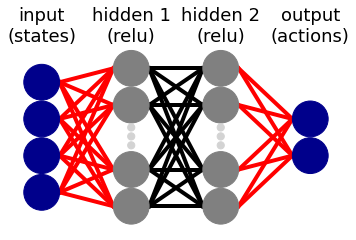

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [78]:
#collapse
from nnv import NNV
layers = [
    {"title":"input\n(states)", "units": states, "color": "darkBlue","edges_color":"red"},
    {"title":"hidden 1\n(relu)", "units": 12, "edges_color":"black"},
    {"title":"hidden 2\n(relu)", "units": 12, "edges_color":"red"},
    {"title":"output\n(actions)", "units": actions,"color": "darkBlue"},  ]
NNV(layers).render()

### 3. Training our Model/Agent

Now that we are at the training stage, we will expain some key topics necessary to having a general understanding of the process.

#### 3A. Preparation
####  i) Replay Memory

Replay memory is essentially a catalogue of past states and actions kept when training our agent. {% fn 2 %} Keras-RL provides a convenient class for storing this information, which can be used as follows.

In [12]:
memory = SequentialMemory(limit=50000, window_length=1)

The 'limit' hyperparameter specifies the size of memory made available during training. When we surpass 50000 experiences, the oldest will be replaced by the newest.

This begs the question - why do we need memory when training?

When we train our IA, it easy to build sequential correlation between actions and states. In simpler terms, if we train our agent on states as they come with time (sequentially), we run the risk of teaching our agent to perform actions soleley based on time, rather than information recieved from the environment. As such, we sample batches of experiences from our memory at random when training our agent as to break this correlation. {% fn 2 %}

A great analogy here would be a comparison between 2 hypothetical students taking a multiple choice math exam. Student A gets hold of the answer key, and decides to remember the answer to every question based on its number in order. Student B decides to study the content, and learn how to answer each question based on what is asked. Student A here reflects training our agent without memory, relying solely on the sequential order of the questions to know the corresponding answer. Student B understands what each question presents, and represents training with memory.

#### ii) Policy

Policy in Keras-RL defines the strategy we use to train our NN. We will be using a simple ε-greedy policy which seeks to balance exploration and exploitation. {% fn 2 %}

In [66]:
policy = EpsGreedyQPolicy(eps=0.3)

The 'eps' hyperparameter controls the probability of exploration, and therefore eps=0.3 implies a 30% probability of exploration.

**Exploration** involves the agent taking random actions in its environment, allowing it to find new 'paths' of actions that it can take to optimize the reward. 

**Exploitation** involves the agent taking actions with the highest expected reward, allowing it to follow 'paths' of actions that yielded greater reward in previous episodes.

#### iii) Deep Q-Network Agent

We will now put these concepts into play during our training.

In [67]:
agent  = DQNAgent(model=model, memory=memory, policy=policy ,nb_actions=actions, nb_steps_warmup=1000)

First, we must create our agent object with references to our model, memory, and policy as seen above. We can define the number of actions that our agent can take through the 'nb_actions' parameter. Furthermore, the parameter 'nb_steps_warmup' allows us to define how many steps our agent should take before we begin to sample from memory for training.

In terms of our ***optimizer***, we will be using Stochastic Gradient Descent (SGD). SGD is the agorithm responsible for adjusting the weights inside of our neural network, details of which we will not go into. Learning Rate (learning_rate) is a hyperparameter that influences the optimization of our NN weights. For a performance metric, we will use mean squared error (mse).

In [68]:
agent.compile(SGD(learning_rate=1e-3), metrics=['mse'])

#### 3B. Training

The next step involves the training of our agent. We will call our .fit() method, which initiates this training. To this method we pass our environment, and give a limit to the number of steps for which we will train. Additionally, we set visualize to False so that our environment is not visible while training, as this would slow down the process.

In [69]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)         #Suppressing Deprecation & User Warnings
agent.fit(env, nb_steps=30000, visualize=False, verbose=1)

Training for 30000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 70s 7ms/step - reward: 1.0000
179 episodes - episode_reward: 55.531 [9.000, 240.000] - loss: 17.322 - mse: 7884.326 - mean_q: 125.991

Interval 2 (10000 steps performed)
10000/10000 [==============================] - ETA: 0s - reward: 1.000 - 74s 7ms/step - reward: 1.0000
101 episodes - episode_reward: 99.168 [11.000, 327.000] - loss: 18.144 - mse: 7978.776 - mean_q: 126.132

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 74s 7ms/step - reward: 1.0000
done, took 218.268 seconds


Now that we have our trained agent, we can test our agent's performance inside of the environment and compare it to our random agent at the beginning of this tutorial.

In [70]:
n_test_episodes = 20
scores = agent.test(env, nb_episodes=n_test_episodes, visualize=0)
print('---------------------------------------')
print('Mean score over',n_test_episodes,'is    --->   ', np.mean(scores.history['episode_reward']))

Testing for 20 episodes ...
Episode 1: reward: 227.000, steps: 227
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 213.000, steps: 213
Episode 4: reward: 196.000, steps: 196
Episode 5: reward: 204.000, steps: 204
Episode 6: reward: 206.000, steps: 206
Episode 7: reward: 204.000, steps: 204
Episode 8: reward: 210.000, steps: 210
Episode 9: reward: 207.000, steps: 207
Episode 10: reward: 210.000, steps: 210
Episode 11: reward: 190.000, steps: 190
Episode 12: reward: 207.000, steps: 207
Episode 13: reward: 225.000, steps: 225
Episode 14: reward: 211.000, steps: 211
Episode 15: reward: 194.000, steps: 194
Episode 16: reward: 193.000, steps: 193
Episode 17: reward: 219.000, steps: 219
Episode 18: reward: 208.000, steps: 208
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 218.000, steps: 218
---------------------------------------
Mean score over 20 is    --->    207.1


In [85]:
RandomAgentTest(env,20)

Episode:1 Score:12.0
Episode:2 Score:17.0
Episode:3 Score:20.0
Episode:4 Score:62.0
Episode:5 Score:25.0
Episode:6 Score:17.0
Episode:7 Score:30.0
Episode:8 Score:20.0
Episode:9 Score:19.0
Episode:10 Score:15.0
Episode:11 Score:13.0
Episode:12 Score:26.0
Episode:13 Score:27.0
Episode:14 Score:27.0
Episode:15 Score:48.0
Episode:16 Score:15.0
Episode:17 Score:16.0
Episode:18 Score:81.0
Episode:19 Score:18.0
Episode:20 Score:20.0
---------------------
Mean score over 20 episodes  -->  26.4


If we observe the above output cells, we can see that our trained agent averaged a score of 207.1 over 20 episodes, while our random agent averaged 26.4 - a huge difference!

We can see how our IA performs on a single run of the game below.

In [71]:
agent.test(env, nb_episodes=1, visualize=1)

Testing for 1 episodes ...
Episode 1: reward: 210.000, steps: 210


<img src="imgs_for_RL/IA.gif" alt="cart pole 3" width="500"/>

Note the ability of the agent to keep the pole balanced for a significantly longer period of time when contrasted to the random agent. This difference reflects the fact that we now have an agent with some hint of useful decision making.

## Wrapping Up

It is with some caution that we can say that our trained agent is now 'smart enough' to play this game. 

As we can infer, RL has numerous applications that extend from such a simplistic environment and can find usefulness in a large scope of fields. It is a field with diverse reach that finds a place for itself in a modern world concerned with automation. Simple environments like the one presented here can serve as an analogue to more real-world problems. Having given this introduction, I implore the reader to further their knowledge into Reinforcement Learning.

Hopefully this read has made you wonder how you can apply RL to other tasks similar to the one presented here. A great stepping stone would be to look into the [OpenAI Gym Documentation ](https://www.gymlibrary.ml/) and explore the environemnets available its users, which range from Atari game recreations to simple 3D locomotion simulations. Try your hand at creating an agent to traverse these environments and along the way explore the various tweaks that can be applied during training to maximize your score!

{{ '[OpenAI Gym Documentation ](https://www.gymlibrary.ml/)' | fndetail: 1 }}
{{ 'Reinforcement Learning: An Introduction, Second Edition by Richard S. Sutton and Andrew G. Bartow [link](http://incompleteideas.net/book/RLbook2020.pdf)' | fndetail: 2 }}